## Insider Buying Scraper

This script attempts to understand a little more clearly the relationship between insider buying, individual buyers and their relationships to the companies bought into.

In [100]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

base_url = 'http://www.finviz.com/insidertrading.ashx?tc=1'
html = requests.get(base_url)
soup = BeautifulSoup(html.content, "html.parser")
table = soup.find('table', attrs={'class': 'body-table'})
rows = table.findAll('tr', attrs={'class':['insider-buy-row-1', 'insider-buy-row-2']})
tick =[]
own = []
rel = []
dt = []
trans = []
c = []
sh = []
val = []
sh_t = []
sec = []
df = pd.DataFrame()


for row in rows:
        cells = row.findAll('td')
        ticker = cells[0].get_text()
        tick.append(ticker)
df['ticker'] = tick  
for row in rows:
        cells = row.findAll('td')
        owner = cells[1].get_text()
        own.append(owner)
df['owner'] = own
for row in rows:
    cells = row.findAll('td')
    relationship = cells[2].get_text()
    rel.append(relationship)
df['relationship'] = rel
for row in rows:
        cells = row.findAll('td')
        date = cells[3].get_text( )
        dt.append(date)
df['date'] = dt
for row in rows:
        cells = row.findAll('td')
        transaction = cells[4].get_text()
        trans.append(transaction)
df['transaction'] = trans
for row in rows:
        cells = row.findAll('td')
        cost = cells[5].get_text()
        c.append(float(cost))
df['cost'] = c
for row in rows:
        cells = row.findAll('td')        
        shares = cells[6].get_text()
        sh.append(shares)
df['shares'] = sh
for row in rows:
        cells = row.findAll('td')        
        value = cells[7].get_text()
        val.append(value)
df['value'] = val
for row in rows:
        cells = row.findAll('td')        
        shares_total = cells[8].get_text()
        sh_t.append(shares_total)
df['shares_total'] = sh_t
for row in rows:
        cells = row.findAll('td')
        sec_form4 = cells[9].get_text()
        sec.append(sec_form4)
df['sec_form4'] = sec


### Print of first 5 rows

In [101]:
df.head()

,ticker,owner,relationship,date,transaction,cost,shares,value,shares_total,sec_form4
0,DST,Bryan Lowell L,Director,Feb 01,Buy,83.33,239,"19,915","49,154",Feb 05 02:21 PM
1,STON,LAUTMAN MARTIN R,Director,Feb 01,Buy,4.88,"1,012","4,939","146,172",Feb 05 02:05 PM
2,CVLY,GIAMBALVO JOHN W,Director,Feb 01,Buy,28.50,"1,754","49,989","4,633",Feb 05 01:58 PM
3,FRME,Lehman Gary,Director,Feb 01,Buy,43.51,38,"1,667","37,515",Feb 05 01:55 PM
4,SBFG,STOLLY TIMOTHY J.,Director,Dec 06,Buy,17.65,175,"3,089","7,018",Feb 05 01:55 PM


### Dataframe with closer look at relationship of insider to company (by ticker)
The below dataframe makes it easier to see the likelihood of the exercising of stocks options, as opposed to more suspicious insider buying based on insider information. Next step would be to plot the price of the given ticker and overlay the point of the insider buying.

In [102]:
df.groupby(['ticker','owner','relationship', 'date']).mean()

cost
ticker owner                          relationship                  date           
AGR    Solomont Alan D                Director                      Feb 01   48.630
AMRB   Owensby Jeffrey                Director                      Feb 01   15.220
ANW    Moore Justin                   10% Owner                     Jan 26    4.800
                                                                    Jan 30    4.690
                                                                    Jan 31    4.650
       SHAH CAPITAL OPPORTUNITY FUND  10% Owner                     Dec 29    4.250
                                                                    Jan 31    4.650
       TOWLE & CO                     10% Owner                     Jan 30    4.730
ASRV   STOPKO JEFFREY A               President & CEO               Jan 29    4.100
BANC   Bogler John A.                 CHIEF FINANCIAL OFFICER       Feb 01   19.300
BETR   HERSHEY CO                     10% Owner                     Jan 31   12.000
BH     BIGLARI, SARDAR                Director                      Feb 01  414.640
                                                                    Jan 25  414.000
                                                                    Jan 26  418.930
                                                                    Jan 29  417.310
                                                                    Jan 30  415.890
                                                                    Jan 31  416.430
BHB    Caras Matthew L                Director                      Feb 01   27.840
BKSC   Lane Hugh C Jr                 Chairman of the Board         Feb 02   19.250
BOCH   Muttera Robert H               EVP & CCO                     Jan 30   11.500
       SILBERSTEIN KARL L             Director                      Jan 25   11.450
                                                                    Jan 26   11.390
       TULLIS LYLE L                  Director                      Jan 29   11.550
BOTJ   FOSTER WATT R JR               Director                      Jan 29   14.950
       LANGLEY LYDIA K                Director                      Jan 26   14.870
BPFH   FURLONG MARK F                 Director                      Jan 29   15.240
       Griffin Corey                  CEO Boston Private Wealth LLC Jan 30   15.190
       MacDonald W. Timothy           EVP, Chief Risk Officer       Jan 25   15.320
BSRR   EVANS ROBB                     Director                      Jan 29   27.760
CNBKA  EVANGELISTA PAUL A             Executive Vice President      Jan 29  137.920
...                                                                             ...
SBFG   STOLLY TIMOTHY J.              Director                      Jun 27   16.870
                                                                    Nov 14   17.340
                                                                    Oct 27   17.660
                                                                    Sep 07   16.190
SFNC   MAKRIS GEORGE JR               Chairman & CEO                Jan 25   58.100
SLG    HOLLIDAY MARC                  Chief Executive Officer       Jan 29   25.200
SOFO   Burish Andrew D.               10% Owner                     Jan 31    2.450
STAR   ISTAR INC.                     10% Owner                     Jan 25   17.980
                                                                    Jan 26   17.830
                                                                    Jan 29   17.740
STON   LAUTMAN MARTIN R               Director                      Feb 01    4.880
SWZ    Dakos Andrew                   Director                      Jan 30   13.450
TCBI   Huntley David S.               Director                      Jan 30   98.100
TCPC   CORBET KATHLEEN A              Director                      Jan 30   15.220
       LEVKOWITZ HOWARD               CEO                           Jan 30   15.255
       Vig Rajneesh                   COO      

### Relationships of Insider Buyers

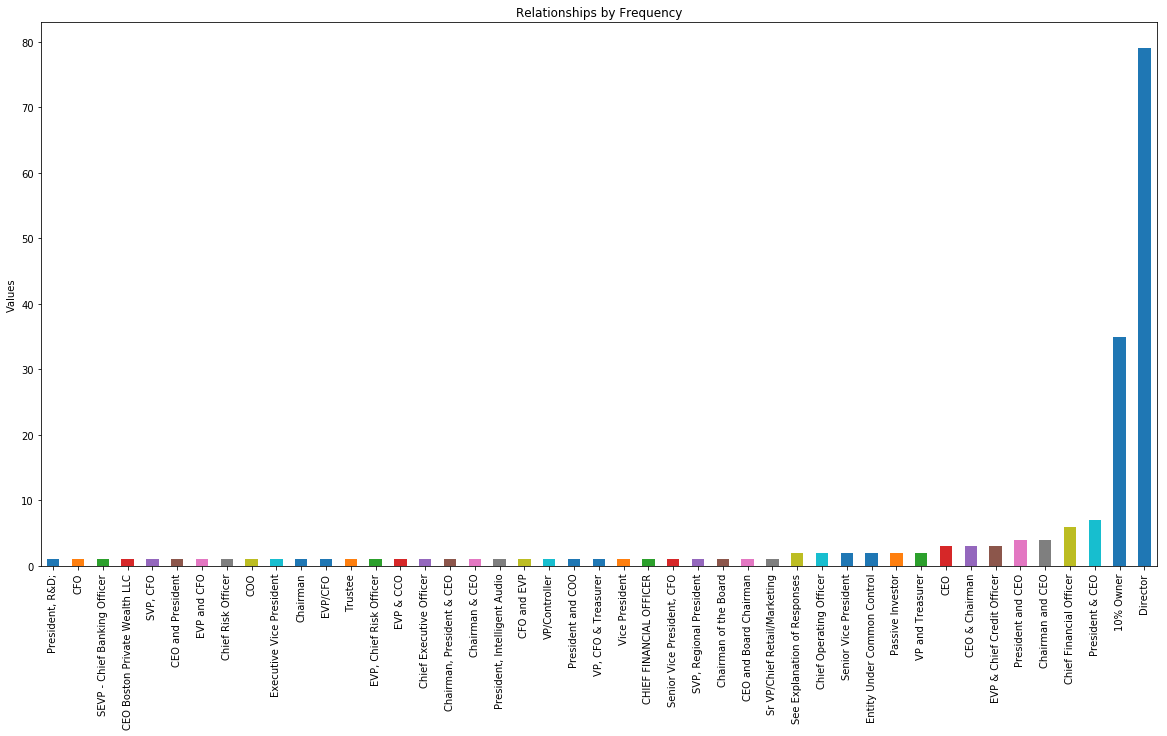

In [103]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
df.relationship.value_counts().sort_values().plot(kind = "bar");
plt.ylabel('Values');
plt.title('Relationships by Frequency');

### Graph of Most Actively Bought Insider Traded Symbols

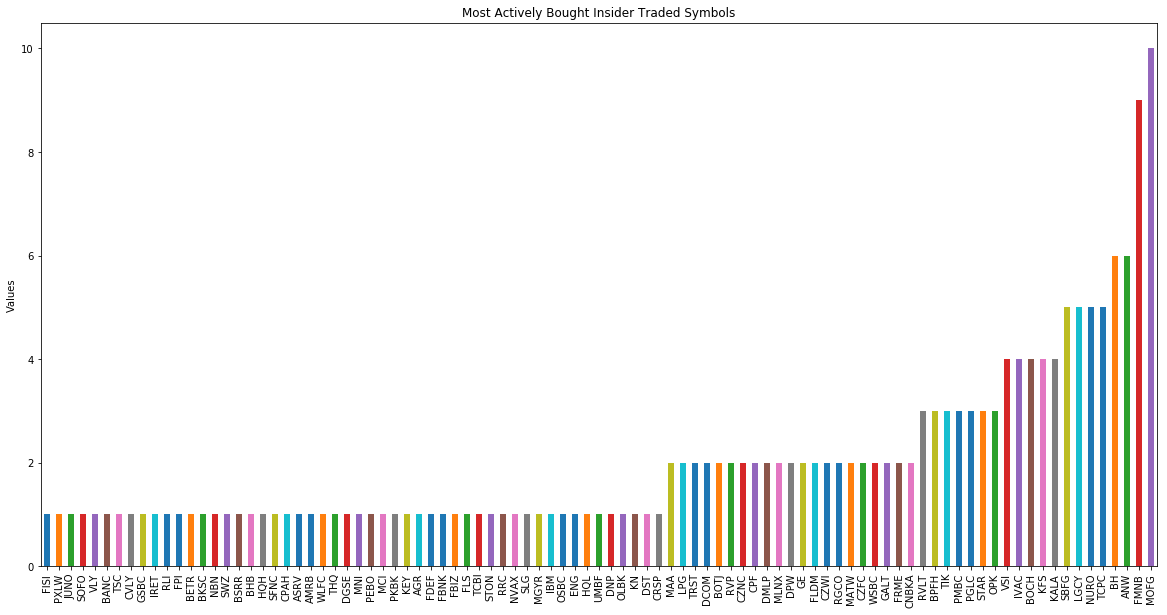

In [105]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
df.ticker.value_counts().sort_values().plot(kind = "bar");
plt.ylabel('Values');
plt.title('Most Actively Bought Insider Traded Symbols');


### Most Active Insider Buyers by Number of Transactions

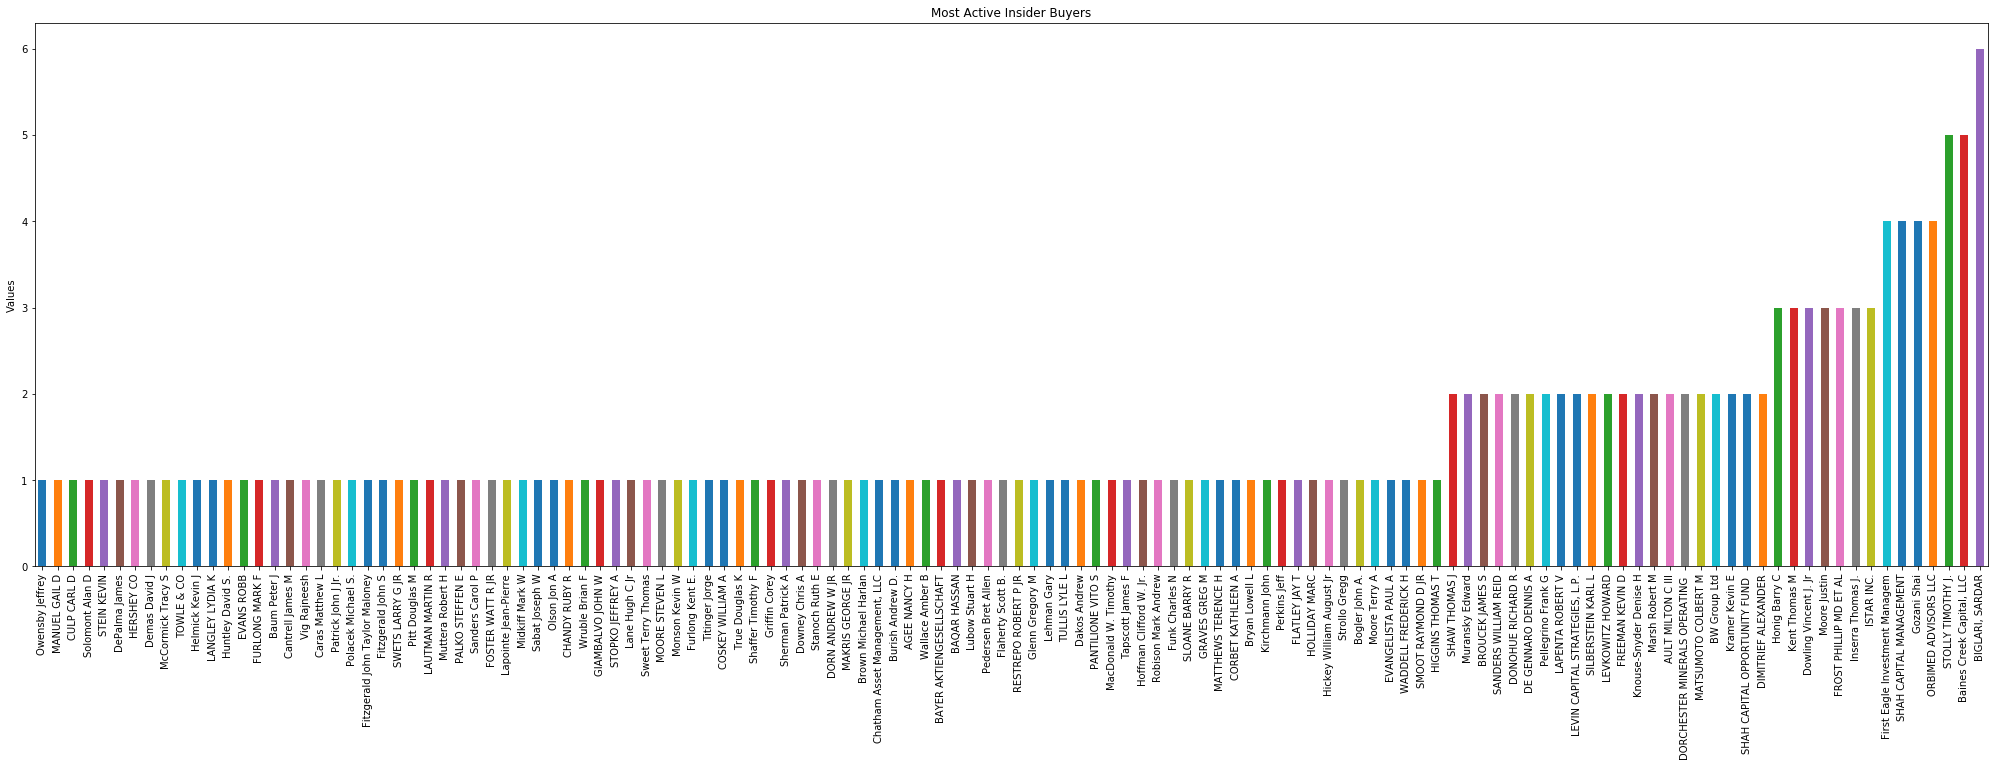

In [106]:
%matplotlib inline
fig = plt.figure(figsize=(35,10))
df.owner.value_counts().sort_values().plot(kind = "bar")
plt.ylabel('Values');
plt.title('Most Active Insider Buyers');